<font color= 'orange'> Inverse Transform </font>

**Repository**: [![Inverse-Transform](https://img.shields.io/badge/Inverse_Transform-README.md-black?style=square&logo=github&logoColor=black)](https://github.com/EstebanMqz/Inverse-Transform)
<br><br>

<div class="alert alert-block alert-info">

In this repository the [**Inverse-transform**](README.md#references) sampling method is illustrated with:

1. $X~\sim U(a, b)$ for [***uniformly distributed***](README.md#references) <u>continuous</u> random variables:

[*`PDF`*](README.md#References) $\rightarrow$ $f(x)$  = $\frac{1}{b-a}$

$$F(x) = \int_{-\infty}^{x} f(x) dx = \int_{a}^{x} \frac{1}{b-a} dx = {\frac{x}{b-a}} \Big|_{a}^{x} = \frac{x-a}{b-a}$$ 

<br><br>

$\therefore$ The Inverse Transform [*`CDF`*](README.md#References) $\rightarrow F(X)$ [*pseudo-random number samplings*](README.md#references) $X_i \in [a, b]$ is: 

$$U = F^{-1}(X) = x(b-a) + a$$ 
<br>

2. $X~\sim B(k; n, p)$ <u>discrete</u> [***Binomial distribution***](README.md#references):<br>

If the probability $p$ of $k$ successes in $n$ trials is given by $X = 10000$ samplings.

$$Pr(k;n,p) = Pr(X=k;n,p) = \binom{n}{k} p^k (1-p)^{n-k}$$

where 

$$\binom{n}{k} = \frac{n!}{k!(n-k)!}$$

it can be expressed with factorial operations as:

$$Pr(k;n,p) = \frac{n!}{k!(n-k)!} p^k (1-p)^{n-k}$$

$\therefore$ $k + 1$ $\times$ the ratio of trials to successes is: 

$$Pr(k+1;n,p) = \frac{(n-k) p}{(k+1)(1-p)} Pr(k;n,p)$$ 
*(see [2.](#2-estebanmqz))*

Analytical results with the further use of [`numpy.random.random`](README.md#references) & [`numpy.random.binomial`](README.md#references) validated with *matplot*:

### Exercise 1:
The time in which a Brownian motion remains above its maximum point in the interval [0,1] has a distribution: $F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$

#### <span style='color:lightbrown'> 1. MarcoSC08 </span><br>

**Inverse transformation**

If it solves: $u=\frac{2}{\pi}\sin^{-1}(\sqrt x)$

$arcsin(\sqrt x)=\frac{u\pi}{2}$

$arcsin(a)=b$ -> $a=sin(b)$ $\sqrt x=\sin(\frac{u\pi}{2})$

Solve for $x=\sin^{2}(\frac{\pi}{2}U)$


In [2]:
#libraries
from math import factorial as fac
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
N=100
def funcion(N):
    y = (np.sin((np.random.random(N)*np.pi)/2))**2
    return y

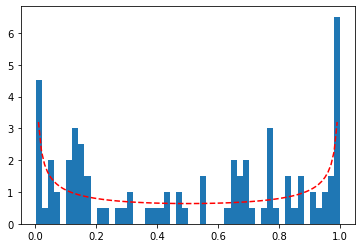

In [4]:
x = np.arange(0,60,0.01)
y2 = 1/(np.pi*(np.sqrt(1-x)*np.sqrt(x)))

plt.plot(x,y2,'r--')

N = 100
r1 = funcion(N)
plt.hist(r1,bins=50,density=True)
plt.show()

##### <span style='color:lightblue'> 1. EstebanMqz </span><br>

Inverse transform method $x=F_X^{-1}(x)$:<br>
$X=\frac{2}{\pi}\sin^{-1}(\sqrt x)$<br><br>
$u=\sqrt x$<br><br>
$u'=\frac{1}{2\sqrt x} =\frac{1}{2u}$<br><br>
$y=\sin^{-1}(u)$<br><br>
$y'= \frac{2}{\pi} \frac{1}{\sqrt{1-u^2}}$<br><br>
$y'=\frac{2}{\pi} \frac{1}{\sqrt{1-x}}\frac{1}{2\sqrt x}$<br><br>
$y'= f(x) =\frac{1}{\pi \sqrt {x(1-x)}}$<br><br>

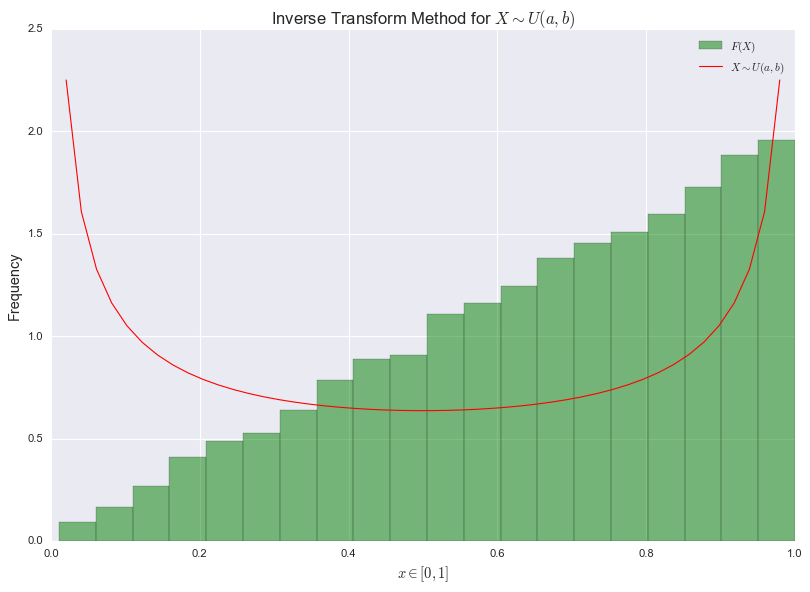

In [39]:
def Brownian(n):
    {"""Function to generate Brownian motion (Wiener process) to model random walks (stochastic processes) (f(X) passed inside).
    Parameters
    ----------
    n : int
        No. of samples
    Returns
    -------
    x : np.array
        Brownian motion (Wiener process).
    """}
    if n < 0:
        raise ValueError('n must be non-negative')
    if n > 1:
        return (np.sin((np.pi/2)*np.random.rand(n)))**2 
    else:
        return 0

def inverse_function(f):
    {"""Inverse function to generate random data from a given f(x).
    Parameters
    ----------
    f : array_like
        Array of random numbers
    Returns
    -------
    g : array_like
        Array of random numbers from a given f(x).
    """}
    return np.sqrt(f)

def random_data(n):
    {"""Generate n random numbers between a = 0 and b = 1 for X ~ U(0,1).
    Parameters
    ----------
    n : int
        Number of random numbers
    Returns
    -------
    f : array_like
        Array of random numbers
    """}
    return np.random.random(n)

def plot_comparison(f, g):
    {"""Comparison plots between the f(x) and its inverse.
    Parameters
    ----------
    f : array_like
        Array of random numbers
    g : array_like
        Array of random numbers from a given f(x).
    Returns
    -------
    + plt.show():
        plots of f(x) and its inverse in the same figure.
    """} 

    plt.style.use('seaborn')
    plt.figure(figsize = (12, 8)) 
    plt.hist(f, bins = 20, label = '$F(X)$', density = True, color='green', alpha=0.5, edgecolor='black')
    x = np.linspace(0,1) 
    y = lambda x: 1/(np.pi*(np.sqrt(x*(1-x)))) 
    plt.plot(x,y(x),'k',lw = 1, label = '$X \sim U(a,b)$', color='red') 
    plt.title("Inverse Transform Method for $X \sim U(a,b)$", fontsize= 15) 
    plt.ylabel('Frequency', fontsize= 13)
    plt.xlabel('$x \in [0,1]$', fontsize= 13)
    plt.legend()
    plt.show() 


n=10000

if __name__ == '__main__':
    f = random_data(n)
    g = inverse_function(f)
    plot_comparison(g, f)

f = Brownian(n)

#### 2. Discrete Random Variable Generation<br>
$x$~$B(n,p)$ models successes out of n independent trials where there is a probability $p$ of success on each trial.
Generate a binomial random variable with parameters $n=10$ and $p=0.7$.<br>
$X\sim binomial(n,p) \longrightarrow p_k=P(X=k)=\frac{n!}{i!(n-k)!}p^k(1-p)^{n-k} ,\quad k={0,1,\cdots,n}$.<br>
By properties of the factorial operation the previous $p_k$ can be written as:<br>
$p_{k+1}=\frac{n-k}{k+1}\frac{p}{1-p} p_k $

#### <span style='color:lightbrown'> 2. MarcoSC08 </span><br>

In [6]:
# student solution code 1
def Gen_discrete_distr(U:'vector of random numbers',
                       p_acum: 'Cumulative P. of the distribution to generate'):
    v = np.array(list(map(lambda j:sum(1 for i in p_acum if i<U[j]),range(N))))
    return v

def plot_histogram_discrete(distribution:'distribution to plot histogram',
                            label:'label of the legend'):
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribution,bins = len(set(distribution))) 
    plt.bar(list(set(distribution)),y,label=label)
    plt.legend()
    plt.show()

def P_accum_Binomial(n,p):
    c = p/(1-p)
    pr = [(1-p)**n]
    add = pr.append
    for i in range(n+1):
        add((c*(n-i)/(i+1))*pr[-1])
    return np.cumsum(pr)

def P_accum_Binomial_o(n,p):
    Pr = np.zeros(n)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        c = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
            
    [pr(i) for i in range(n-1)] 
    return np.cumsum(Pr)

In [7]:
#markdown all in one is not being displayed in ctrl+p, why?

#Becau

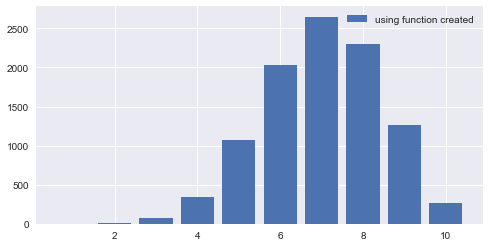

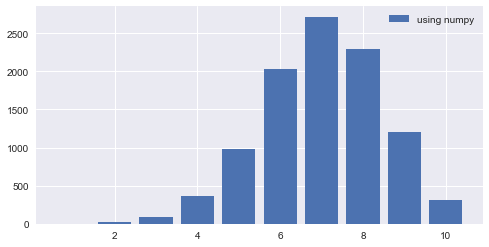

In [8]:

n=10; p = 0.7; N = 10**4

p_acum = P_accum_Binomial_o(n,p)
u = np.random.rand(N)

d_binomial = Gen_discrete_distr(u,p_acum)
plot_histogram_discrete(d_binomial,'using function created')

d_bino_numpy = np.random.binomial(n,p,N)
plot_histogram_discrete(d_bino_numpy,'using numpy')

##### <span style='color:lightblue'> 2. EstebanMqz </span><br>

<a name = 2-estebanmqz></a>

<div class="alert alert-block alert-info">

The [**Inverse-transform**](https://en.wikipedia.org/wiki/Inverse_transform_sampling) method is used to generate $X = 10000$ <u>discrete</u> random variables and then compared against [`numpy.random.binomial`](README.md#references) and verified.:

for $k={0,1,2,..,10} , n=10, p=0.7, X=10000$

$$Pr(X = k;n,p) = \binom{n}{k} p^k (1-p)^{n-k}$$

If the probability $p$ of $k$ successes in $n$ trials is given by $X = 10000$ samplings for the [`Binomial distribution`](README.md#references):

$$Pr(k;n,p) = Pr(X=k;n,p) = \binom{n}{k} p^k (1-p)^{n-k}$$

where 

$$\binom{n}{k} = \frac{n!}{k!(n-k)!}$$

reduced with factorials to:

$$Pr(k;n,p) = \frac{n!}{k!(n-k)!} p^k (1-p)^{n-k}$$

$$Pr(k+1;n,p) = \frac{n!}{(k+1)(k)!(n-k-1)!} p^{k+1} (1-p)^{n-k-1}$$

$$Pr(k+1;n,p) = \frac{n-k}{(k+1)(1-p)} p^{k+1} (1-p)^{n-k-1}$$

$$Pr(k+1;n,p) = \frac{n-k}{(k+1)(1-p)} p (p^k (1-p)^{n-k})$$

$\therefore$ $k + 1$ $\times$ the ratio of trials to successes is: $$Pr(k+1;n,p) = \frac{(n-k) p}{(k+1)(1-p)} Pr(k;n,p)$$



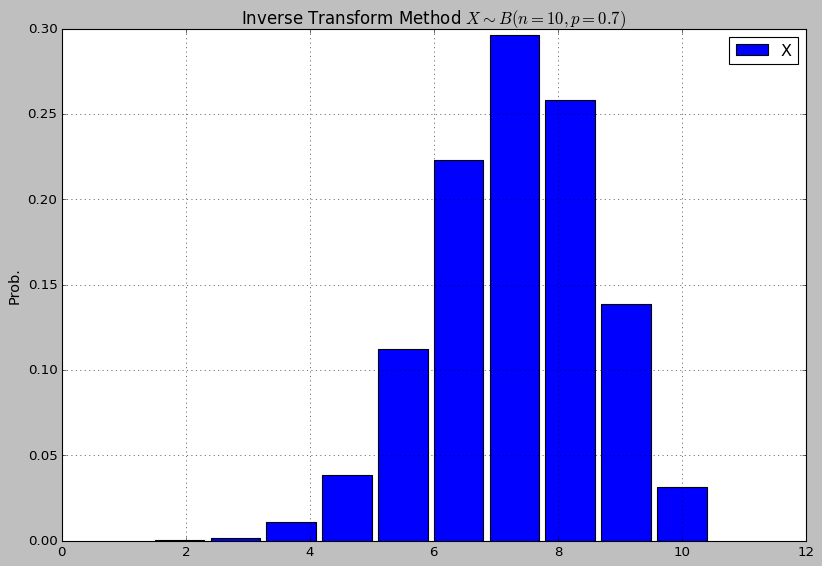

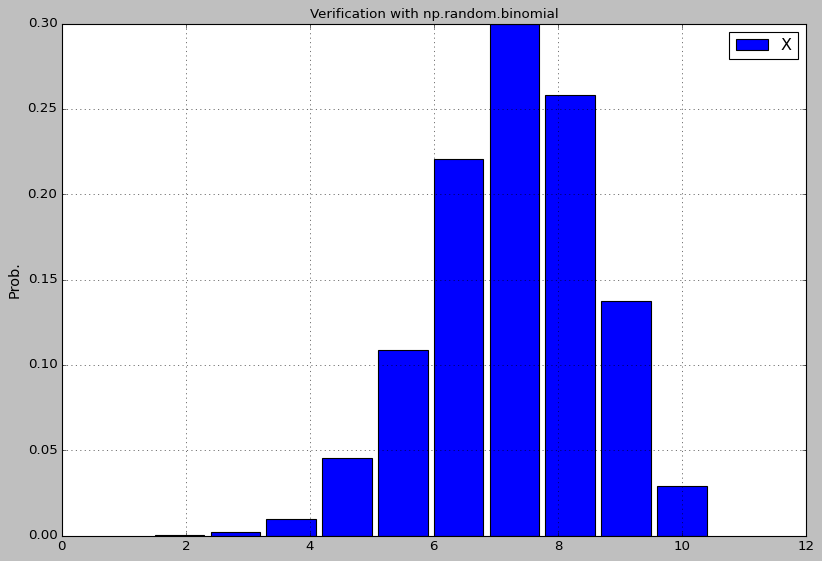

In [38]:
def inverse(n,p,N):
    {'''
    Binomial function generated from a uniform distribution by using
    the formula: ((p/(1-p))*(n-i)/(i+1))*pi.
    Parameters:
    -------
    n: number of trials
    p: probability of success
    N: number of random numbers
    Returns:
    -------
    + inv: numpy.ndarray
        array of random numbers generated from the Inverse Transform Method.
    '''}

    def accum():
        pk = np.zeros(n) 
        pk[0] = (1-p)**n 
        def p_n(i): 
            nonlocal pk 
            pk[i+1]=((p/(1-p))*(n-i)/(i+1))*pk[i] 
        [p_n(i) for i in range(n-1)] 
        return pk.cumsum() 
    p_cum = accum() 
    u = np.random.rand(N) 
    inv = np.array(list(map(lambda z:sum(1 for i in p_cum if i<u[z]),range(N))))
    return inv

def discrete_histogram(dist):
    {'''
    Function to plot the histogram of the generated discrete function. It receives the discrete distribution f(x).
    Parameters:
    -------
    + dist: np.array
        Array of random numbers generated from the Inverse Transform Method.
    Returns:
    -------
    + plt.show(): 
        Histogram of the generated discrete function.
    
    '''}
    y,x = np.histogram(dist,bins = len(set(dist)),density = True)
    plt.style.use('classic')
    plt.bar(x[1:],y)
    plt.legend("X")
    plt.show()

n = 10
p = 0.7
N = 10000

plt.style.use('classic')

inv = inverse(n,p,N)
plt.figure(figsize = (12, 8)) 
plt.ylabel('Prob.', fontsize= 13)
plt.title('Inverse Transform Method $X\sim B(n= 10, p= 0.7)$', fontsize= 15)
plt.grid()
discrete_histogram(inv)

plt.figure(figsize = (12, 8)) 
plt.ylabel('Prob.', fontsize= 13)
plt.title('Verification with np.random.binomial', fontsize= 12)
plt.grid()
discrete_histogram(np.random.binomial(n,p,N))

In [ ]:
#Make an hyperlink to this <img src="github.com/EstebanMqz/Inverse-Transform/tree/main/images/Description.jpg" width="684" height="521"> which just displays the title Github-app (.md parser)

[Github-app .md parser](github.com/EstebanMqz/Inverse-Transform/tree/main/images/Description.jpg)